CNN

In [22]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [23]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalizing pixel value b/w 0 & 1

train_images, test_images = train_images / 255, test_images/ 255

class_names  = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']



170508288/170498071 [==============================] - 6s 0us/step


Text(0.5, 0, 'automobile')

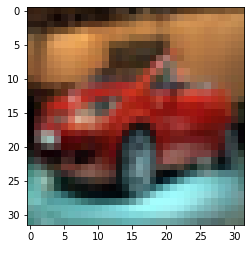

In [24]:
IMG_INDEX = 45

plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])

CNN Architecture - stack of Convolutional and maxPooling layers extract feature  from the image. Then these features are flattened and fed to a densely 
connected layer that determine the class of the image.

In [25]:
model = models.Sequential() #The Sequential model API is a way of creating deep learning models where 
#an instance of the Sequential class is created and model layers are created and added to it
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))



Layer 1

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

Layer 2

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

Other Layers

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

This convolution layer base extracts the features in an image, and use these dense networks and use these combination of features and classify the images.

Adding Dense Layers

In [27]:
model.add(layers.Flatten())# flatten all the pixels, i.e put (4, 4, 64) into a single layer
model.add(layers.Dense(64, activation = 'relu'))# 64 neuron dense layer that will connect all of the layers with an activation function
model.add(layers.Dense(10))# output layer with 10 neurons

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

Training

In [29]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=4,
                    validation_data = (test_images, test_labels))


Epoch 1/4
1563/1563 [==============================] - 20s 7ms/step - loss: 1.5501 - accuracy: 0.4308 - val_loss: 1.3014 - val_accuracy: 0.5283
Epoch 2/4
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1727 - accuracy: 0.5827 - val_loss: 1.1399 - val_accuracy: 0.5950
Epoch 3/4
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0240 - accuracy: 0.6384 - val_loss: 0.9967 - val_accuracy: 0.6533
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9268 - accuracy: 0.6747 - val_loss: 0.9391 - val_accuracy: 0.6737


Evaluating the model

In [30]:
test_loss, test_accu = model.evaluate(test_images, test_labels, verbose = 2)
print(test_accu*100)

313/313 - 1s - loss: 0.9391 - accuracy: 0.6737 - 690ms/epoch - 2ms/step
67.36999750137329


Data Augmenatation

In [31]:
# Data Augmenation is a technique to create a larger dataset from smaller one. It reduces overfitting. 
# It performs random transformation like compressions, rotations, streches and color changes

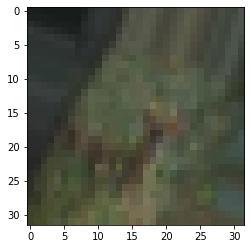

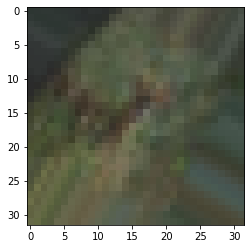

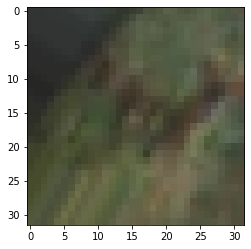

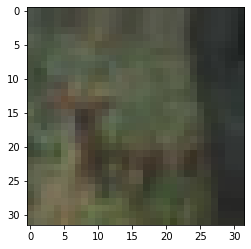

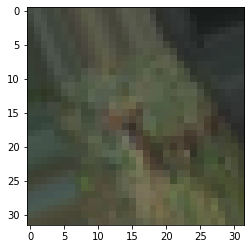

In [32]:
from keras.preprocessing.image_dataset import image_dataset_from_directory
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

#creating a data generator object that transforms image

datagen = ImageDataGenerator(rotation_range= 40, width_shift_range=0.2, 
                             height_shift_range= 0.2,
                             shear_range= 0.2, zoom_range= 0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# pick an image to transform

test_img = train_images[10]
img = image.img_to_array(test_img)# convert image to numpy array
img = img.reshape((1,) + img.shape)# reshape image

i =0

for batch in datagen.flow(img, save_prefix = 'test', save_format = 'jpeg'): # It will do random augmentation/ transformation on an image until the loop breaks
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i +=1
  if i>4:
    break
plt.show()





Pretrained Models

We are going to use models that are trained by google for this purpose.
we are going to use the part of that model, as our base model. we are going to train the last few layers, called fine tuning.


The beginning of the model or the base of that model is going to pick up general features, pick up the edges etc. The last few layers will help in identifying features like shapes. We add just few layers to the end part,
to classify the images better.  

In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

Dataset - we will load the cats vs dogs dataset from the module tensorflow_datasets.

This dataset contains (image, label) pairs where images have different dimensions and 3 color channels.


In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# splitting the data manually into 80% training, 10% testing, 10% training

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split = ['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info = True,
   as_supervised = True)

In [ ]:
get_label_name = metadata.features['label'].int2str
#creating a function that allow us to call the strings with some integer

for image, label in raw_train.take(2):
  plt.image()
  plt.imshow(image)
  plt.title(get_label_name(label))


Data Preprocessing- converting images to same dimensions

In [ ]:
IMG_SIZE = 160 # size of the image will be 160x160

def format_example(image, label):

 """ return an image that is reshaped to IMG_SIZE """

 image = tf.cast(image, tf.float32) #The "tf. cast" function casts a tensor to new type.
 image = tf.cast(image, tf.float32)
 image = tf.cast(image, tf.float32) 
 image = (image/127.5)
 image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

 return image, label



In [ ]:
""" Converting the images to the above dimension"""

train = raw_train.map(format_example)
validation = raw_validation(format_example)
test = raw_test(format_example)

In [ ]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))


In [ ]:
for img, label in raw_train.take(2):
  print("Original shape", img.shape)

for img, label in train.take(2):
  print("New shape", img.shape)

Picking a Pretrained Model

The model we are going to use as the convolutional base for our model is the MobileNet V2 developed at Google. This model is trained on 1.4 million images and has 1000 different classes.

We only use the convolution base. We don't want the classification part

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# creating a base model from the pre_trained model MobileNet V2

base_model = tf.keras.application.MobileNetV2(imput_shape = IMG_SHAPE<
                                              include_top = False,
                                              weights = 'imagenet')

In [ ]:
for image, _ in train_batches.take(2):
  pass

  feature_batch = base_model(image)
  print(feature_batch.shape)

Base_model will simply output a shape (32, 5, 5, 1280) tensor that is a feature extraction from our original (1, 160, 160, 3) image. The 32 means that we have 32 layers of differnt filters/features.

Freeezing the Base

The term freezing refers to disabling the training property of a layer. It simply means we won’t make any changes to the weights of any layers that are frozen during training. This is important as we don't want to change the convolutional base that already has learned weights.

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary

Adding Our Classifier

Now that we have our base layer setup, we can add the classifier. Instead of flattening the feature map of the base layer we will use a global average pooling layer that will average the entire 5x5 area of each 2D feature map and return to us a single 1280 element vector per filter.

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()


Fianlly we add the prediction layer that will be a single dense neuron and pedict the 2 classes

In [ ]:
prediction_layer = keras.layers.Dense(1)

Combining the Layers

In [ ]:
model = tf.keras.Sequential([
                             base_model,
                             global_average_layer,
                             prediction_layer
])

In [ ]:
model.summary()

**Training the Model** - Learning the weights and biases for the global_average_layer and prediction_layer
1281 params are there on the outer layer, i.e 1280 weights and 1 bias

In [ ]:
base_learning _rate = 0.0001 #we use a small learning rate beacuse we don't
#want to have major changes
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr =base_learning _rate ).
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrices = ['accuracy'])


In [ ]:
# We can evaluate the model right now to see how it does before training it on our new images

initial_epochs = 3
validation_steps = 20

losss0, accuracy0 = model.evaluate(validation_batches, steps = valodation_steps)

In [ ]:
#training

history = model.fit(train_batches,
                    epochs = initial_epochs,
                    validation_data =validation_batches)

acc = history.history['accuracy']
print(accu)

In [ ]:
model.save("dogs_vs_cats.h5")
new_model = tf.keras.models.load_model("dogs_vs_cats.h5")# ones it is trained we don't have to retrain the model onews again

In [ ]:
model.predict

In [ ]:
#Object Detection